In [7]:
import numpy as np 
import pandas as pd
import nltk

In [8]:
column_names = ['ID', 'Game', 'Sentiment', 'Text']

# Read the CSV file into a DataFrame with manual column names
file_path = r"E:\archive (1)\twitter_training.csv"
train_data = pd.read_csv(file_path, names=column_names, header=None)

# Display the first few rows with manual column names
print(train_data.head())

     ID         Game Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [10]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [11]:
def preprocess_text(text):
    words = word_tokenize(text)
    words = [ps.stem(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

In [13]:

from nltk.tokenize import word_tokenize

train_data['Text'].isnull().sum()


train_data['Text'].fillna('', inplace=True)

train_data['Processed_Text'] = train_data['Text'].apply(preprocess_text)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(train_data['Processed_Text'], train_data['Sentiment'], test_size=0.2, random_state=42)


In [15]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [16]:
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [17]:
predictions = classifier.predict(X_test_vec)

In [18]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.70


In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

  Irrelevant       0.75      0.56      0.64      2592
    Negative       0.68      0.82      0.74      4519
     Neutral       0.73      0.58      0.65      3596
    Positive       0.69      0.76      0.72      4230

    accuracy                           0.70     14937
   macro avg       0.71      0.68      0.69     14937
weighted avg       0.71      0.70      0.70     14937



In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions, labels=train_data['Sentiment'].unique())

# Plot the confusion matrix as a heatmap


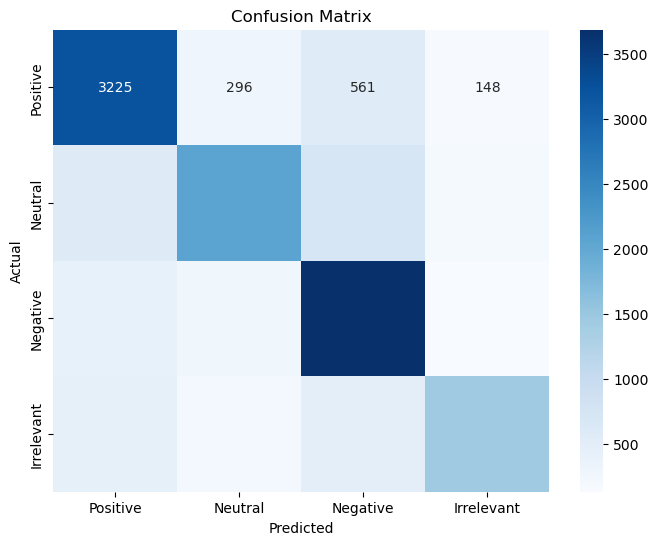

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_data['Sentiment'].unique(), yticklabels=train_data['Sentiment'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
